In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [6]:
df=pd.read_excel('Add_sales_data_2018.xlsx')

In [7]:
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [8]:
df.tail()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444
204,2017-12-08,287.55,289.90,285.05,288.05,288.45,5421.842


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  205 non-null    datetime64[ns]
 1   Add1(in Thousands)    205 non-null    float64       
 2   Add2(in Thousands)    205 non-null    float64       
 3   Add3(in Thousands)    205 non-null    float64       
 4   Add4(in Thousands)    205 non-null    float64       
 5   Add5(in Thousands)    205 non-null    float64       
 6   Profit(in Thousands)  205 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 11.3 KB


In [10]:
df.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [11]:
df2=df.set_index('Date')

In [12]:
df2

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Date,,,,,,
2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...
2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013


### 1.Check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

<AxesSubplot:>

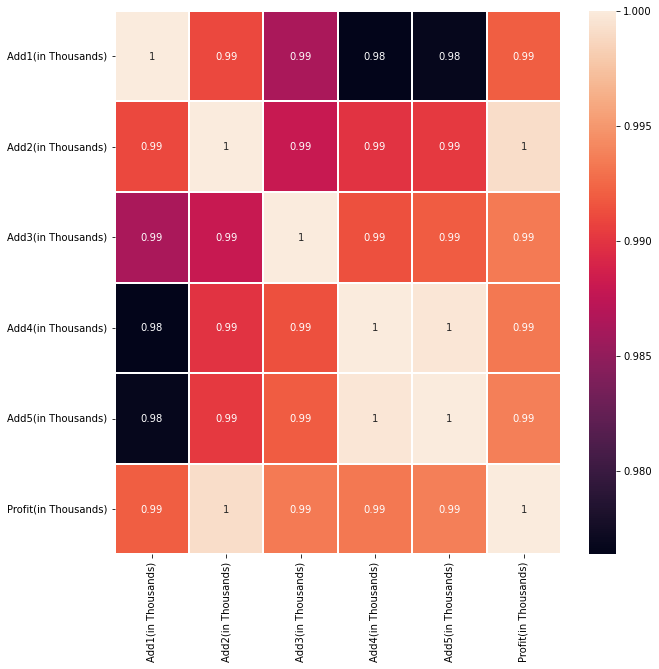

In [22]:
corrmatrix=df2.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmatrix,annot=True,linewidth=0.1)

###### -Add 2 has the strongest correlation 1 with the profit generated.
##### -Balance ads also have strong correlation of 0.99 with profit

## 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [24]:
df2.columns

Index(['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)',
       'Add4(in Thousands)', 'Add5(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

In [27]:
x=df2.drop(['Profit(in Thousands)'],axis=1)
y = df2['Profit(in Thousands)']

In [41]:
df2.dtypes

Add1(in Thousands)      float64
Add2(in Thousands)      float64
Add3(in Thousands)      float64
Add4(in Thousands)      float64
Add5(in Thousands)      float64
Profit(in Thousands)    float64
dtype: object

<AxesSubplot:>

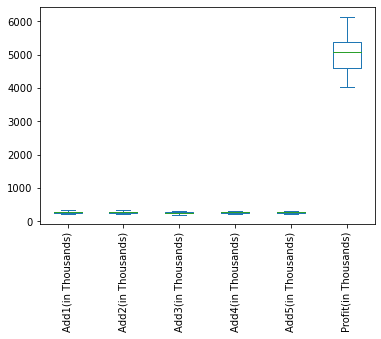

In [44]:
df.plot(kind ='box',rot=90)

In [45]:
x

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
Date,,,,,
2018-10-08,208.00,222.25,206.85,216.00,215.15
2018-10-05,217.00,218.60,205.90,210.25,209.20
2018-10-04,223.50,227.80,216.15,217.25,218.20
2018-10-03,230.00,237.50,225.75,226.45,227.60
2018-10-01,234.55,234.60,221.05,230.30,230.90
...,...,...,...,...,...
2017-12-14,288.00,288.25,279.20,284.50,284.30
2017-12-13,290.00,292.50,282.20,284.80,284.45
2017-12-12,298.60,298.60,286.65,287.45,287.80


In [29]:
y

Date
2018-10-08    4093.065
2018-10-05    4042.448
2018-10-04    4213.819
2018-10-03    4391.665
2018-10-01    4350.683
                ...   
2017-12-14    5374.105
2017-12-13    5439.655
2017-12-12    5545.013
2017-12-11    5565.444
2017-12-08    5421.842
Name: Profit(in Thousands), Length: 205, dtype: float64

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size = 0.25 )

In [32]:
lr=linear_model.LinearRegression()

In [33]:
model=lr.fit(x_train,y_train)

In [35]:
predictions=model.predict(x_test)

In [59]:
predictions[:5]

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282])

In [56]:

print(y_test.head())

Date
2018-09-12    4152.066
2018-09-24    4446.441
2018-05-14    5131.898
2018-03-26    4907.560
2018-06-27    5004.282
Name: Profit(in Thousands), dtype: float64


In [38]:
print("mse is",mean_squared_error(predictions,y_test))

mse is 3.8177566733216664e-25


#### The mean squared error is very low and we got an almost perfectly fit linear regression model to predict the profit.

### 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

In [49]:
x1 = {"Add1(in Thousands)" : [290],"Add2(in Thousands)": [312] ,"Add3(in Thousands)": [309] ,"Add4(in Thousands)": [298],"Add5(in Thousands)": [320]}
x_test = pd.DataFrame(x1)
x_test

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,290,312,309,298,320


In [50]:
lr.predict(x_test)

array([5820.06])

In [61]:
x_test.sum(axis=1)

0    1529
dtype: int64

### If company spends 1529(in Thousands) for ads then the profit generated will be 5820.06(in Thousands)